# IPHONE ONLINE SALES ANALAYS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
order_details=pd.read_csv("C:/Users/MANI/Downloads/Order_details(masked).csv")

In [8]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [12]:
order_details

,Name,Email,Product,Transaction Date,Time,Hour
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,2021-01-03 00:47:26,0
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07,2
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,2021-01-03 09:10:43,9
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,2021-01-03 09:49:48,9
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,2021-01-03 10:56:46,10
...,...,...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03,2021-07-03 23:53:03,23
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01,2021-07-03 23:55:01,23
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24,2021-07-03 23:58:24,23
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26,2021-07-03 23:59:26,23


Step 2:
Create a new column called Time that has the DateTime format after converting the Transaction Date column into it. The DateTime format, which has the pattern YYYY-MM-DD HH:MM:SS, can be customized however you choose. Here we’re more interested in obtaining hours, so we can have an Hour column by using an in-built function for the same:

In [9]:
# here we have take transaction
# date columns

order_details["Time"]=pd.to_datetime(order_details["Transaction Date"])

In [11]:
# After that we extraced hour
# From the transaction date columns

order_details["Hour"]=(order_details["Time"]).dt.hour

Step 3: 
We then require the “n” busiest hours. For that, we get the first “n” entries in a list containing the occurrence rates of the hours when the transaction took place. To further simplify the manipulation of the provided data in Python, we may utilize value counts for frequencies and tolist() to convert to list format. We are also compiling a list of the associated index values.

In [14]:
# n=24 in this case can be modifite
# as per need to see "n" businest hour

timemost1=order_details["Hour"].value_counts().index.tolist()

timemost2=order_details["Hour"].value_counts().index.tolist()

In [17]:
tmost=np.column_stack((timemost1,timemost2))

Step 4:
Finally, we stack the indices (hour) and frequencies together to yield the final result.

In [23]:
print("Hour of Day"+"\t"+"cumulative Number of purchases \n")
print("\n".join("\t\t".join(map(str,row))for row in tmost))


Hour of Day	cumulative Number of purchases 

23		23
12		12
22		22
19		19
21		21
15		15
20		20
11		11
13		13
18		18
16		16
14		14
17		17
10		10
0		0
9		9
8		8
7		7
1		1
2		2
5		5
6		6
3		3


Step 5: 
Before we can create an appropriate data visualization, we must make the list slightly more customizable. To do so, we gather the hourly frequencies and perform the following tasks:

In [38]:
timemost=order_details["Hour"].value_counts()
timemost1=[]

for i in  range(0,23):
    timemost1.append(i)
    
    timemost2 = timemost.sort_index()
    timemost.tolist()
    timemost2=pd.DataFrame(timemost2)

Step 6: 
For data visualization, we will proceed with Matplotlib for better comprehensibility, as it is one of the most convenient and commonly used libraries. But, It is up to you to choose any of the pre-existing libraries like Matplotlib, Ggplot, Seaborn, etc., to plot the data graphically.

The commands written below are mainly to ensure that X-axis takes up the values of hours and Y-axis takes up the importance of the number of transactions affected, and also various other aspects of a line chart, including color, font, etc., to name a few.

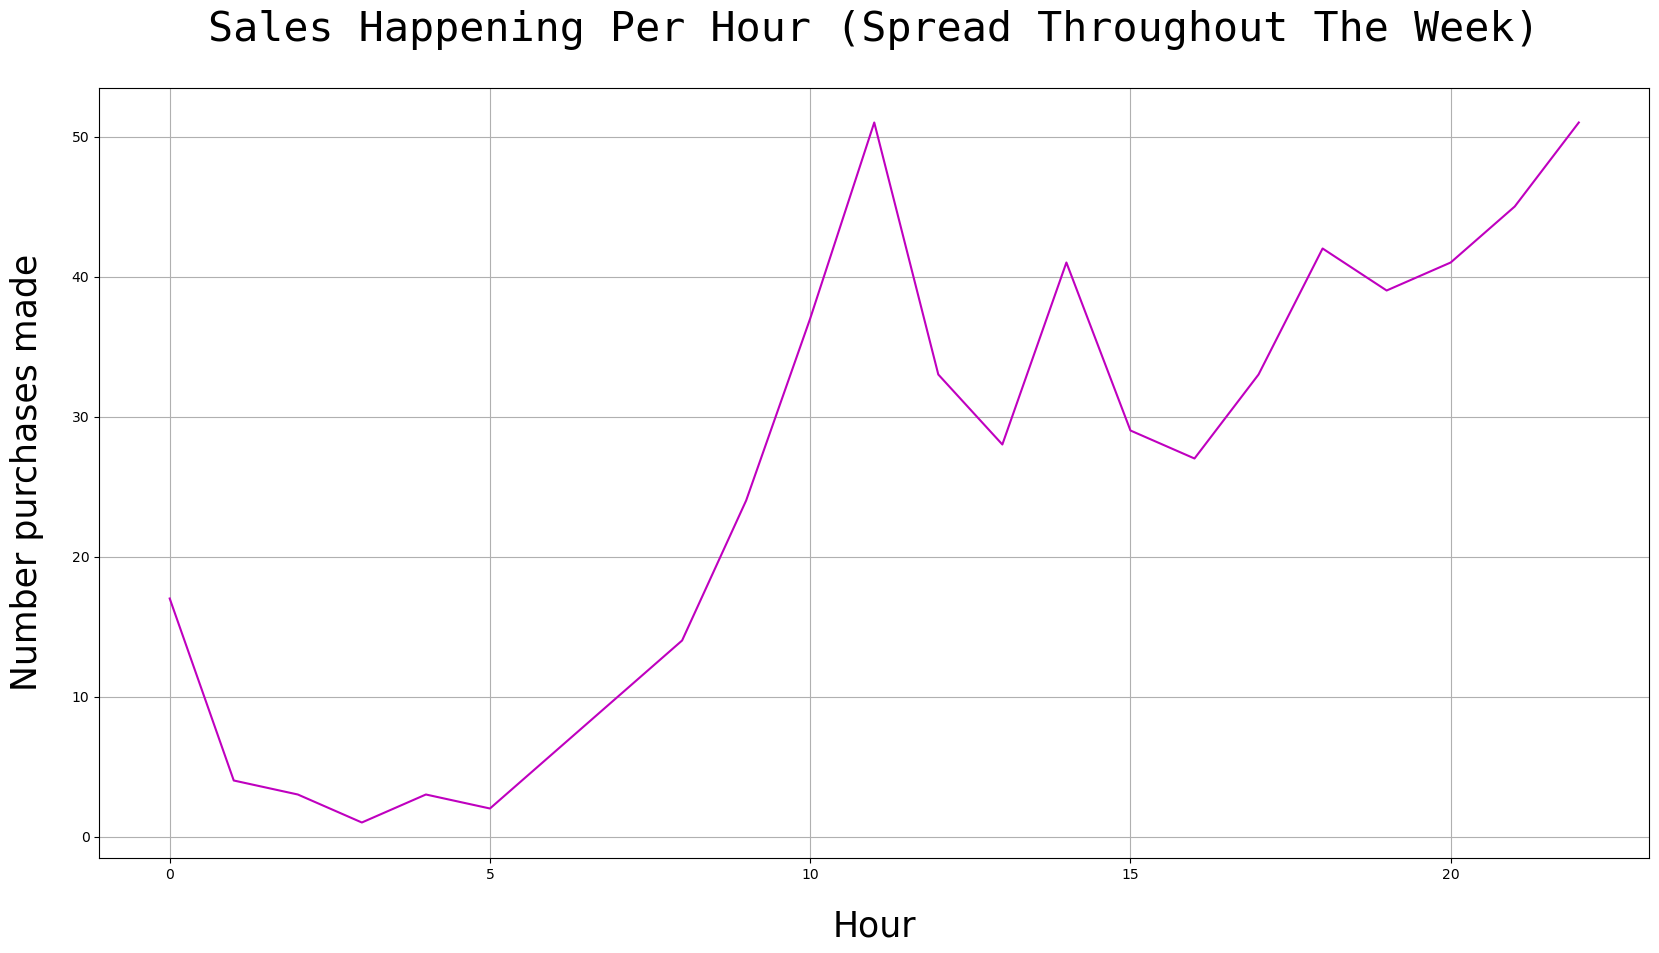

In [49]:
plt.figure(figsize=(20,10))
plt.title('Sales Happening Per Hour (Spread Throughout The Week)',
          fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)
plt.ylabel("Number purchases made",fontsize=25,labelpad=20)
plt.xlabel("Hour",fontsize=25,labelpad=20)
plt.plot(timemost1,timemost2,color="m")
plt.grid()
plt.show()

The results are indicative of how sales typically peak in late evening hours prominently, and this data can be incorporated into business decisions to promote a product during that time specifically.

In [52]:
from datetime import date

# date object of today's date
today = date.today() 

print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)


Current year: 2025
Current month: 1
Current day: 30
